<a href="https://colab.research.google.com/github/kahumawalter/Price-Prediction/blob/main/Project_2_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/drive/MyDrive/Coding Dojo/Week 7/Diamonds Prices2022.csv'

df = pd.read_csv(path)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


There are 53,940 diamonds in the dataset with 10 features (carat, cut, color, clarity, depth, table, price, x, y, and z). Most variables are numeric in nature, but the variables cut, color, and clarity are ordered factor variables with the following levels.
About the currency for the price column: it is Price ($)
And About the columns x,y, and z they are diamond measurements as (( x: length in mm, y: width in mm,z: depth in mm ))

In [3]:
# The unnamed column is unnecessary so I decided to drop it.

diamond_df = df.drop(columns=['Unnamed: 0'])
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
#Checking to see if there any difficult values
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
#The data has no missing values. 
diamond_df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
# Assigning the y (target) and X (features)
y = diamond_df['price']
X = diamond_df.drop(columns=['price', 'cut', 'color', 'clarity'])

In [8]:
X.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


Creating two visuals that demonstrate key findings of interest to a stakeholder.

In [59]:
#creating a sample dataset of 1000 data points to avoid overplotting

df_sample = diamond_df.sample(1000)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



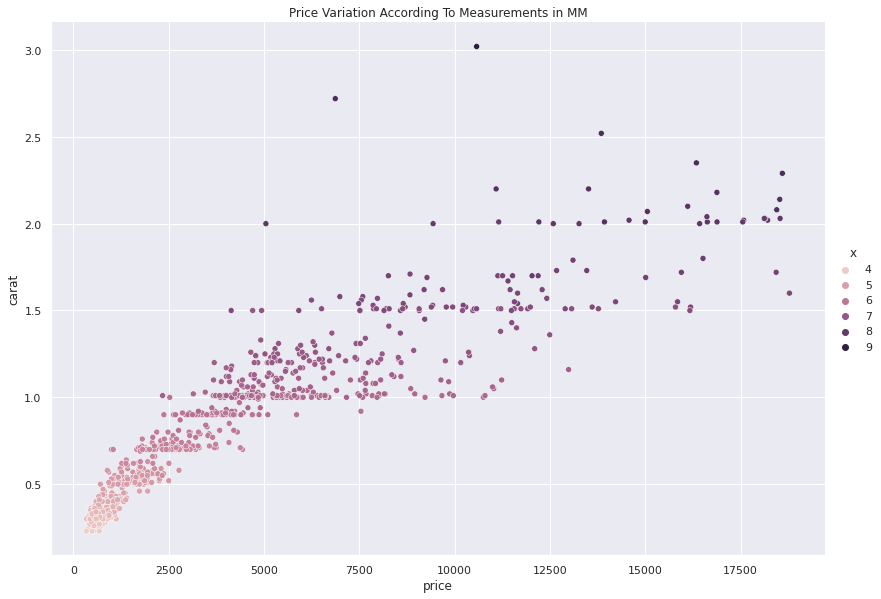

In [60]:
sns.relplot(df_sample['price'], df_sample['carat'],hue= df_sample['x'], height=8.27, aspect=11.7/8.27).set(title='Price Variation According To Measurements in MM');



According to the scatter plot which sampled 1000 data points, the more the carats the higher the price of the diamonds. However there are some outliers where the carats were roughly high as 1.6 but were valued at 5500. There were also times when the carat was relatively low at 1.3 but the diamond was valued at 15,000USD.

The scatter plot also shows us the length(x) of the diamond which varies in color. As the length of the diamond grows the more expensive the diamond turned out to be.

However there are some outliers where length was 8mm but the diamond price was roughly low at 7500 USD and when the length was 9mm (the highest) but the price was relatively low at about 10,500USD. While in some other situations the diamond length was 6mm but the price was relatively high at 15,000 USD. 

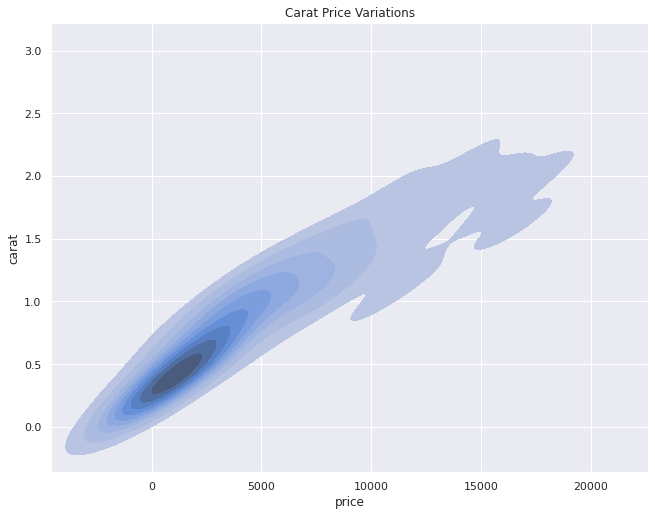

In [80]:
sns.kdeplot(x=df_sample["price"], y=df_sample["carat"], shade=True)
plt.title('Carat Price Variations')
plt.show()

According to the density graph above, the majority of the diamonds in our sample data have 0.2 to 0.8 carats as shown by the dark contours and these range between 300 and 2500 USD. The graph also shows that the majority of the diamonds are less than 5000 USD. 